In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV


C:\Users\leona\AppData\Local\Temp\ipykernel_7796\975421266.py:2: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Dataset/Dados da Torre de Santarém com NPP - Dados da Torre de Santarém com NPP.csv.csv')


GradientBoostingRegressor R-squared (R2 Score): 0.19152023570798504
RandomForestRegressor R-squared (R2 Score): 0.17748507633618849
O melhor modelo é: GradientBoostingRegressor com R-squared: 0.19152023570798504


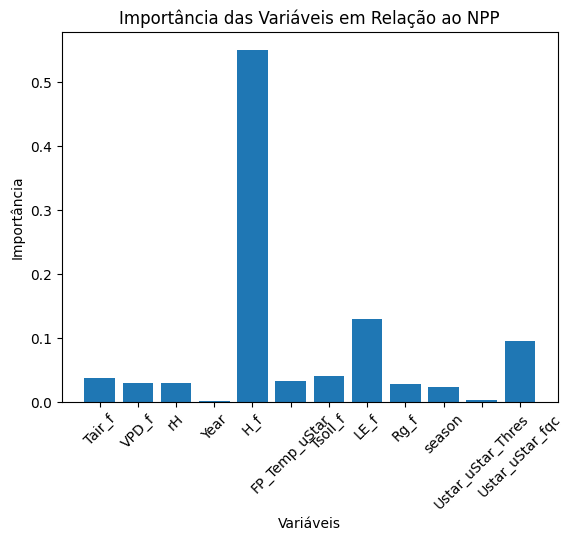

In [17]:
# Carregue seus dados em um DataFrame
data = pd.read_csv('Dataset/Dados da Torre de Santarém com NPP - Dados da Torre de Santarém com NPP.csv.csv')

# Divida os dados em recursos (X) e rótulo (y)
X = data[['Tair_f', 'VPD_f', 'rH', 'Year', 'H_f', 'FP_Temp_uStar', 'Tsoil_f', 'LE_f', 'Rg_f', 'season', 'Ustar_uStar_Thres', 'Ustar_uStar_fqc']]
y = data['NPP']

# Padronize os recursos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Defina uma lista de modelos para comparar
models = [
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=42)),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42))
]

best_model = None
best_r2 = -float('inf')

# Hiperparâmetros a serem ajustados usando GridSearchCV
param_grid = {
    'GradientBoostingRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1, 0.01]
    },
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5]
    }
}

# Treine e avalie cada modelo com GridSearchCV
for name, model in models:
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model_for_name = grid_search.best_estimator_
    y_pred = best_model_for_name.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} R-squared (R2 Score): {r2}')
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = best_model_for_name

# Escolha o melhor modelo com base no R-squared
print(f'O melhor modelo é: {best_model.__class__.__name__} com R-squared: {best_r2}')

# Calcule a importância das características para o melhor modelo
feature_importance = best_model.feature_importances_

# Crie um gráfico de barras para mostrar a importância das características
plt.bar(X.columns, feature_importance)
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.title('Importância das Variáveis em Relação ao NPP')
plt.xticks(rotation=45)
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C:\Users\leona\AppData\Local\Temp\ipykernel_7796\2245519749.py:2: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Dataset/Dados da Torre de Santarém com NPP - Dados da Torre de Santarém com NPP.csv.csv')


MSE (Mean Squared Error): 78033953.96985255
MAE (Mean Absolute Error): 5402.829300506766
R-squared (R2 Score): 0.013894761081989726


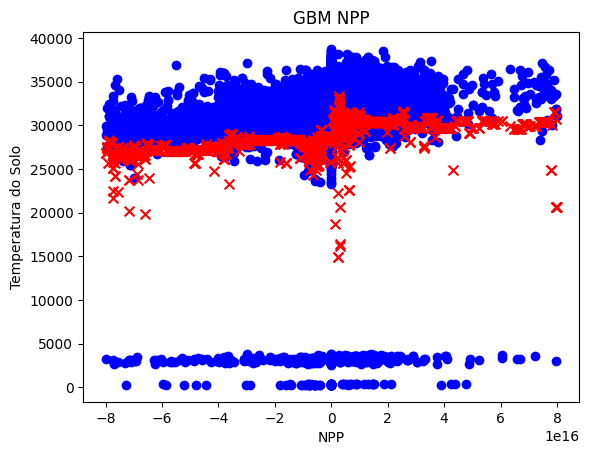

In [18]:



# Carregue seus dados em um DataFrame
data = pd.read_csv('Dataset/Dados da Torre de Santarém com NPP - Dados da Torre de Santarém com NPP.csv.csv')


# Divida os dados em recursos (X) e rótulo (y)
X = data[['NPP']]  
y = data['Tsoil_f']  


# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Pipeline com pré-processamento (normalização) e modelo GBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('gbm', GradientBoostingRegressor())
])


# Parâmetros para otimização usando GridSearchCV
param_grid = {
    'gbm__n_estimators': [50, 100, 200],  # Número de árvores
    'gbm__learning_rate': [0.01, 0.1, 0.2],  # Taxa de aprendizado
    'gbm__max_depth': [3, 4, 5]  # Profundidade máxima das árvores
}


# GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# Melhor modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_


# Avaliação do modelo
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'MSE (Mean Squared Error): {mse}')
print(f'MAE (Mean Absolute Error): {mae}')
print(f'R-squared (R2 Score): {r2}')


# Visualização das previsões
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red', marker='x', s=50)
plt.xlabel('NPP')
plt.ylabel('Temperatura do Solo')
plt.title('GBM NPP')
plt.show()

